# AutoMushroom

AutoMushroom to pakiet, który umożliwia automatyzację procesu klasyfikacji grzybów na jadalne i trujące. Narzędzie wykorzystuje techniki uczenia maszynowego, takie jak Random Forest, Gradient Boosting, Logistic Regression, KNeighbors oraz Voting Classifier, w celu przypisania nowych próbek do jednej z dwóch klas. Model został zoptymalizowany pod kątem minimalizacji błędów klasyfikacji grzybów trujących jako jadalnych, co czyni go odpowiednim do zastosowań w krytycznych procesach decyzyjnych. Pakiet umożliwia także generowanie raportu z wynikami klasyfikacji, w tym miar oceny jakości modelu, takich jak accuracy, precision, recall, F1, ROC AUC oraz specjalnie stworzonego custom core, który balansuje ROC AUC oraz recall.

### Grupa docelowa
 Grupą docelową użytkowników są osoby zajmujące się analizą danych oraz podejmowaniem decyzji w oparciu o klasyfikację, takie jak: 

1.	**Biologia i ekologia** – np. badacze profesjonalnie zajmujący się identyfikacją grzybów jadalnych i trujących w celach edukacyjnych.
2.	**Branża żywnościowa** – osoby odpowiedzialne za kontrolę jakości produktów i bezpieczeństwa żywności, zwłaszcza w kontekście zagrożeń związanych z toksynami w grzybach.
3.	**Entuzjaści grzybobrania** – osoby, które chcą wykorzystać narzędzie do celów prywatnych w celu weryfikacji potencjalnych zagrożeń spożycia zebranych grzybów. 

### Specjalizacja narzędzia
Narzędzie specjalizuje się w:  

1.	**Klasyfikacji** – model wykorzystuje zaawansowane techniki klasyfikacji w celu przypisania nowych próbek (danych wejściowych) do dwóch klas: grzyb jadalny (klasa 0) i trujący (klasa 1).
2.	**Predykcji prawdopodobieństwa** – umożliwia prognozowanie prawdopodobieństwa, czy nowo dostarczone dane o grzybach wskazują na ich jadalność lub trujący charakter, bazując na historycznych danych.
3.	**Optymalizacji modeli uczenia maszynowego** – narzędzie integruje różne klasyfikatory (np. RandomForest, Gradient Boosting, Logistic Regression, VotingClassifier), dobiera najlepsze hiperparametry za pomocą metody RandomSearch, zapewniając jak najlepszą jakość predykcji. Do wyboru są trzy tryby działania pakietu – szybki, średni oraz wolny. W zależności od wyboru, przeszukiwanych jest więcej hiperparametrów kosztem czasu wytrenowania modelu.
4.	**Ocena jakości predykcji** – narzędzie dostarcza szczegółowe miary oceny modeli (accuracy, precision, recall, F1, ROC AUC), a także specjalnie stworzonego custome_score, który balansuje ROC AUC oraz recall. Umożliwia ocenę skuteczności i ryzyka zastosowania modelu w praktyce.
Model uwzględnia kluczowe aspekty bezpieczeństwa, takie jak minimalizacja błędów klasyfikacji grzybów trujących jako jadalnych, co czyni go odpowiednim do zastosowań w krytycznych procesach decyzyjnych.



### Przegląd istniejących rozwiązań

#### Artykuł Predicting Mushroom Edibility with Effective Classification and Efficient Feature Selection Techniques
https://www.researchgate.net/publication/369422963_Predicting_Mushroom_Edibility_with_Effective_Classification_and_Efficient_Feature_Selection_Techniques

Porównanie naszego rozwiązania do analizy przedstawione w artykule można podsumować w kilku punktach:
1. **Opis danych** – Dane z arytukułu pochodzą z bazy UCI i zawierają 20 cech (17 nominalnych i 3 metryczne), np. kolor, kształt, średnica kapelusza, wysokość trzonu itp. Klasyfikacja opiera się na dwóch klasach: „jadalne” i „trujące”. Dane zawierają brakujące wartości, które zostały uzupełnione w trakcie analizy. Dane są zatem identyczne, jak te wykorzystane w naszej pracy.
2. **Analiza danych i selekcja cech:** W pracy badano rozkłady cech i sezonowość występowania grzybów. Zastosowano model Extremely Randomized Trees do oceny znaczenia cech. W analizowanej pracy autorzy skupili się na identyfikacji najbardziej istotnych cech, podczas gdy w naszym projekcie ich selekcja odbywa się za pomocą metody SelectFromModel, a wyniki są prezentowane w raporcie, jednak nie zajmujemy się dokładną ich analizą
4. **Algorytmy klasyfikacji:** Przeprowadzono eksperymenty z 9 algorytmami: k-NN, SVM, Random Forest, Decision Tree, Neural Net (MLP), AdaBoost, Naive Bayes, i Quadratic Discriminant Analysis (QDA).
Powtarzające się modele z naszą pracą to: Random Forest i k-NN.
Autorzy nie wspomniano o użyciu metod takich jak Grid Search ani Random Search do wyboru parametrów modeli. W naszej pracy została użyta metoda Random Search, co daje możliwość znalezienia najlepszych parametrów oraz lepszego jakościowo modelu niż w artykule. 
5. **Ewaluacja modeli:** Tak jak my, autorzy sprawdzali wyniki różnych metryk m.in. dokładność, precyzję, czułość, F1-score. W naszej pracy jest uwzględniony spejcalnie stworzony przez nas Custome score, który powstał na potrzebę typu danych (balansując miarę roc auc oraz recall).
6. **Finalny model:**  W artykule najlepszym i rekomendowanym modelem w zadaniu klasyfikacji binarnej grzybów okazał się KNN. W naszej pracy to również ten model okazał się najbardziej odpowiednim wyborem (a zaraz po nim Voting składający się m.in. z k-NN).



#### Porównanie z pracą Mushroom Classification
https://github.com/awesomecosmos/Mushroom-Classification

Porównanie podejścia z githuba z naszym rozwiązaniem:
##### Podobieństwa:
1.	**Dane:**
    Korzystanie z podobnych zbiorów danych o grzybach - binarny problem klasyfikacji (jadalny vs trujący).
2.	**Algorytmy:**
    W obu projektach testowano kilka algorytmów, m.in. KNN i Random Forest.
	KNN okazał się najlepszy pod względem precyzji u autora repozytoriumn jak i u nas. 
	Dodatkowo w naszej pracy rekomendowany jest też model Voting, który wykorzystywał algorytmy takie jak: KNN, GradientBoosting, Random Forest i regresje logistyczną.
3.	**Metryki ewaluacyjne:**
	Skupienie na dokładności, precyzji, czułości, F1-score i AUC. W naszej pracy dodatkowo specjalnie stworzony Custome score, który miał balansować miarę roc auc oraz recall. 

##### Różnice:
1.	**Selekcja cech:**
	W artykule analizowano znaczenie cech poprzez SVC i obserwację ważności cech (np. kolor zasłony, wielkość blaszek).
	W naszym projekcie cechy są wybierane za pomocą metody SelectFromModel i pokazywane w raporcie.
2.	**Modele:**
	Artykuł testował więcej modeli, w tym XGBoost, SVC, i Naive Bayes, które nie były obecne w naszym rozwiązaniu.
	My dodatkowo rozważyliśmy GradientBoostingClassifier, co nie zostało uwzględnione w analizie z githuba.
3.	**Optymalizacja:**
	Nasze podejście zawiera optymalizację hiperparametrów za pomocą RandomSearch, czego brak w raporcie autora – modele z domyślnymi dla algorytmów parametrami.
	
**Kluczowe punkty analizy:**
1. W pracy Mushroom Classification skupiono się na cechach najbardziej wpływających na klasyfikację, jak wielkość blaszek, obecność siniaków i rodzaj pierścienia. 
W naszym rozwiązaniu również pojawia się wybór najbardziej istotnych cech, jednak nie skupialiśmy się na tym tak bardzo jak autor.
2. Eliminowano modele z oznakami nadmiernego dopasowania, co u nas nie było rozważanie, jednak przy optymalizacji RandomSearch overfitting jest to zjawisko w pewnym stopniu 
eliminowane przy kroswalidacij.
3. Ostatecznie rekomendowano KNN lub SVC jako algorytmy najlepiej klasyfikujące. U nas KNN (lub Voting, który składa się m.in. z KNN).


# Komponenty techniczne

Pakiet został zaimplementowany jako klasa AutoMushroom, która umożliwia automatyzację procesu klasyfikacji grzybów na jadalne i trujące. Klasa ta zawiera następujące metody:

1.	**fit(X, y, mode = 'medium')** – metoda trenująca model na danych wejściowych X i etykietach y. Parametr mode określa tryb działania optymalizacji modeli (domyślnie 'medium'). Do wyboru są trzy tryby: 'fast', 'medium', 'slow', które różnią się liczbą iteracji w RandomSearch, wpływając na jakość optymalizacji modeli, kosztem czasu wytrenowania modelu.

2. **predict(X)** – metoda przewidująca etykiety dla danych wejściowych X.

3. **predict_proba(X)** – metoda przewidująca prawdopodobieństwa przynależności do klas dla danych wejściowych X.
4. **summary_report()** – metoda generująca raport z wynikami optymalizacji modeli, w tym miarami oceny jakości modelu.

Publiczne atrybuty klasy AutoMushroom:
1. **best_model** – najlepszy model klasyfikacji.
2. **best_score** – wartość custom_score dla najlepszego modelu.
3. **metrics** – miary oceny jakości modelu.

### Funkcje preprocessingowe 

Preprocessing danych zaimplementowany jest w funkcji `prep`, która uzupełnia braki danych warościami średnimi dla danych numerycznych oraz najczęściej występującą wartością dla danych kategorycznych. Zmienne numeryczne są również skalowane do przedziału [0,1], a zmienne kategoryczne kodowane za pomocą metody One Hot Encoding. Przygotowując dane treningowe wybierane są najbardziej istotne zmienne za pomocą metody SelectFromModel uzywającej do selekcji model Random Forest ze 100 estymatorami. Wybrane zmienne są zapisywane, aby przy preprocessingu danych testowych wybrać te same kolumny.

### Automatyzacja wyboru i optymalizacji modeli

Optymalizacja modeli zaimplemantowana jest w funkcji `model_selection`, która umożliwia wybór najlepszego modelu klasyfikacji na podstawie przekazanych danych wejściowych. Funkcja ta przeszukuje przestrzeń hiperparametrów różnych klasyfikatorów (RandomForest, Gradient Boosting, Logistic Regression, KNeighbours, VotingClassifier) za pomocą metody RandomSearch (CV = 3), dobierając najlepsze hiperparametry. W zależności od wybranego trybu działania (mode = ["fast", "medium", "slow"]), w RandomSearch wykonywana jest różna liczba iteracji, co wpływa na jakość optymalizacji modeli, kosztem czasu wytrenowania modelu. Funkcja zwraca najlepszy model klasyfikacji oraz wartość custom_score, który balansuje ROC AUC oraz recall.

Wybrane do pakietu modele i zakresy ich parametrów są zdefiniowane w pliku `models.json`. Funkcje `load_models` oraz `parse_params` umożliwiają wczytanie modeli z pliku w funkcji `model_selection`.

Funkcja `custom_score` oblicza wartość Custom score, który balansuje ROC AUC oraz recall. Funkcja ta jest wykorzystywana w funkcji `model_selection` do oceny jakości modeli klasyfikacji podczas RandomSearch.

### Generowanie raportu
Funkcja `model_evaluation` umożliwia ocenę jakości modeli klasyfikacji na podstawie przekazanych danych wejściowych. Funkcja ta zwraca miary oceny jakości modelu, takie jak accuracy, precision, recall, F1, ROC AUC.

Proces generowania finalnego raportu w klasie AutoMushroom odbywa się za pomocą funkcji `summary_report`, która korzysta z pomocniczych funkcji zaimplementowanych w pliku `report.py`. 
Poniżej znajduje się szczegółowy opis kroków zawartych w tym procesie:

Na początku raport zawiera ogólną informację o zadaniu realizowanym przez paczkę AutoML. 
Opisuje cel klasyfikacji, który w tym przypadku dotyczy przewidywania klasy grzybów jako jadalnych lub trujących.
Następnie wyświetlane jest ogólne podsumowanie oryginalnego zbioru treningowego danych - liczba wierszy, kolumn, rodzaje zmiennych, ewentualne braki danych.
Następnie za pomocą funkcji `plot_mushroom_balance` wizualizowany jest podział na klasy - jadalną i trującą w postaci wykresu, aby zobrazować balans klas. 
W zależności od stosunku podziału wyświetlana jest informacja, że zbiór jest zbalansowany, lekko niezbalansowany lub niezbalansowany.

Następnie w skrócie opisany jest zastosowany przez nas preprocessing (informacje jakich funkcji preprocessingowych użyliśmy, co szczegółowo opisane jest powyżej).
Przeprowadzona jest również inspekcja ważności cech - użytkownik dowiaduje się, ile i które cechy pozostawiono do trenowania modelu. 
Umożliwia to ocenę, czy dana kolumna wpływa na klasyfikację. 

Kolejny krok to podanie  najważniejszych informacji o ocenie modelu.
Pojawia się informacja o Custome Score, opisanym powyżej, jakich modeli używaliśmy, jaką metodą dobieraliśmy hiperparametry oraz parametry finalnego algorytmu.
Dodatkowo, wyświetla się czas trenowania modelu i uzyskana wartość Custom Score dla tego modelu na zbiorze walidacyjnym. 

Za pomocą funkcji `plot_confusion_matrix` wyświetlana jest macierz błędów. Wyróżnione jest pole False Negative, 
które reprezentują błędne klasyfikacje trujących grzybów jako jadalnych, co może prowadzić do tragicznych skutków.
Za pomocą funkcji `plot_roc_auc_curve` prezentujemy krzywą ROC i wynik miary AUC. Z kolei wykorzystując funkcję `plot_metrics_bar` wizualizujemy na wykresie słupkowym 
wyniki pięciu miar uzyskanych na zbiorze walidacyjnym. Oprócz czterech podstawowych: dokładności, czułości, precyzji i F1 znajduje się tam 
też wynik naszego Custome Score.

Na koniec generowany jest ostatni element i zarazem innowacyjny, czyli interpretacja wyników. Analizujemy wyniki czterech miar: dokładności, czułości, precyzji i F1. 
Dla każdej z miar wyróżnilismy trzy progi. Pierwszy, gdy wynik jest powyżej 90%, drugi, gdy wynik osiąga wartość z zakresu (80%, 90%) oraz trzeci, czyli wynik poniżej 80%. 
Reprezentuje to umowny podział na dobry, średni i słaby wynik.
Odpowiednio dla sytuacji wyswietla się informacja anlizująca daną sytuację, np. gdy precyzja modelu jest niska uzytkownik odczytuje informację: "Precyzja modelu jest niska (<80%).Może prowadzić do błędów, gdzie jadalne grzyby są mylone z trującymi, co może zniechęcać użytkowników." 
Dodatkowo na koniec użytkownik jest zachęcany do szczególnej uwagi na miarę recall (czułość) wraz z wyjaśnieniem jej znaczenia w kontekście klasyfikacji grzybów.
Raport kończy się edukacyjną wskazówką, która pomaga mniej doświadczonym użytkownikom lepiej zrozumieć znaczenie miar i wyniki modeli.

#  Przykładowe użycie pakietu

In [1]:
!pip install git+https://github.com/polmos02/AutoML-package.git

  Cloning https://github.com/polmos02/AutoML-package.git to c:\users\macie\appdata\local\temp\pip-req-build-ed1kftoy


  ERROR: Error [WinError 2] Nie można odnaleźć określonego pliku while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [2]:
from AutoMushroom import AutoMushroom
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split

c:\Users\macie\anaconda3\envs\python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Downloading datasets

In [3]:
path1 = kagglehub.dataset_download("prishasawhney/mushroom-dataset")
path2 = kagglehub.dataset_download("devzohaib/mushroom-edibility-classification")
path3 = kagglehub.dataset_download("uciml/mushroom-classification")

In [4]:
data1 = pd.read_csv(f"{path1}/mushroom_cleaned.csv")
data2 = pd.read_csv(f"{path2}/secondary_data.csv", delimiter=";")
data3 = pd.read_csv(f"{path3}/mushrooms.csv") 

In [5]:
y1 = data1["class"]
X1 = data1.drop("class", axis=1)

In [6]:
y2 = data2["class"]
X2 = data2.drop("class", axis=1)
y2 = y2.map({'p': 1, 'e': 0})

In [7]:
y3 = data3["class"]
X3 = data3.drop("class", axis=1)
y3 = y3.map({'p': 1, 'e': 0})

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=10)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=10)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=10)

### Dataset 1

In [9]:
automl1 = AutoMushroom()
automl1.fit(X_train1, y_train1, mode = "fast")

c:\Users\macie\anaconda3\envs\python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [10]:
print(automl1.best_score)
print(automl1.metrics)
automl1.best_model

0.9641390886446087
{'accuracy': 0.9620633819107102, 'precision': np.float64(0.9594538684319405), 'recall': np.float64(0.9723270440251572), 'f1': np.float64(0.965847563515202), 'roc_auc': np.float64(0.9608797242829604), 'confusion_matrix': array([[1840,   98],
       [  66, 2319]]), 'roc_curve': (array([0.       , 0.0505676, 1.       ]), array([0.        , 0.97232704, 1.        ]))}


KNeighborsClassifier(n_neighbors=9)

In [11]:
automl1.predict(X_test1)

array([0, 1, 1, ..., 1, 1, 0])

Pakiet AutoMushroom dla grzybiarzy
Analizowane są zbiory danych z podziałem na klasy 0 lub 1, gdzie 0 oznacza jadalny grzyb, a 1 trujący.
Analiza danych:
Liczba wierszy: 43228
Liczba kolumn: 8
Liczba zmiennych kategorycznych: 0
Liczba zmiennych numerycznych: 8
Nie ma braków danych.
Balans klas:


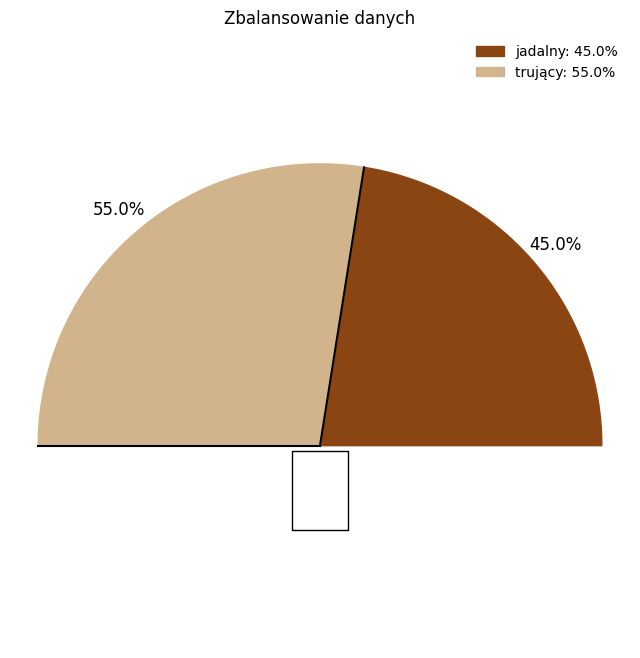

Zbiór jest zbalansowany.
Preprocessing składa się z kilku etapów:
Numeryczne dane są wypełniane średnią w przypadku braków, a następnie skalowane do zakresu [0,1] przy użyciu MinMaxScaler.
Dane kategoryczne są uzupełniane najczęściej występującymi wartościami, a następnie kodowane za pomocą metody one-hot encoding.
W trybie treningowym wybierane są istotne cechy za pomocą klasyfikatora Random Forest i SelectFromModel, a dane testowe są ograniczane do wybranych cech.
Ważność cech:
Łącznie wybrano 5 cech.
Wybrane cechy:
Index(['cap-diameter', 'gill-attachment', 'gill-color', 'stem-width',
       'stem-color'],
      dtype='object')
Analiza jakości modeli i konfiguracja finalnego komitetu:
1. Miara oceny modeli:
   Do analizy jakości modeli wykorzystano kombinację ważonych miar ROC AUC oraz Recall:
   Custom Score = (Recall: 0.3, ROC AUC: 0.7)

2. Modele użyte w analizie: KNeighborsClassifier, GradientBoostingClassifier, RandomForestClassifier, LogisticRegression
   Dodatkowo komitet Voti

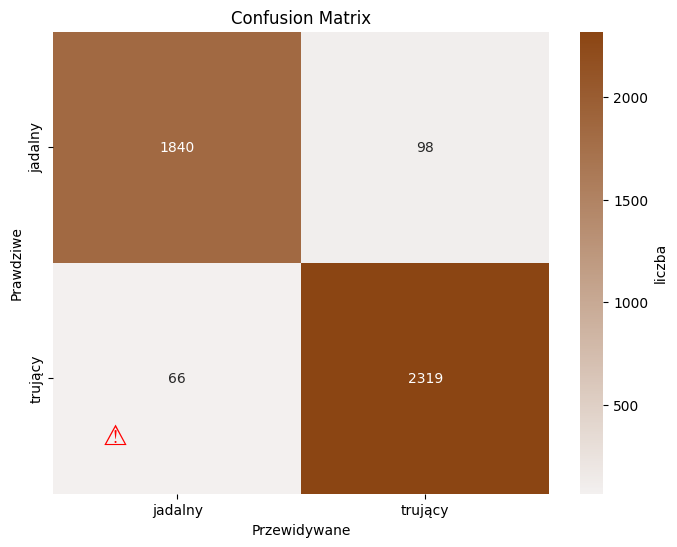

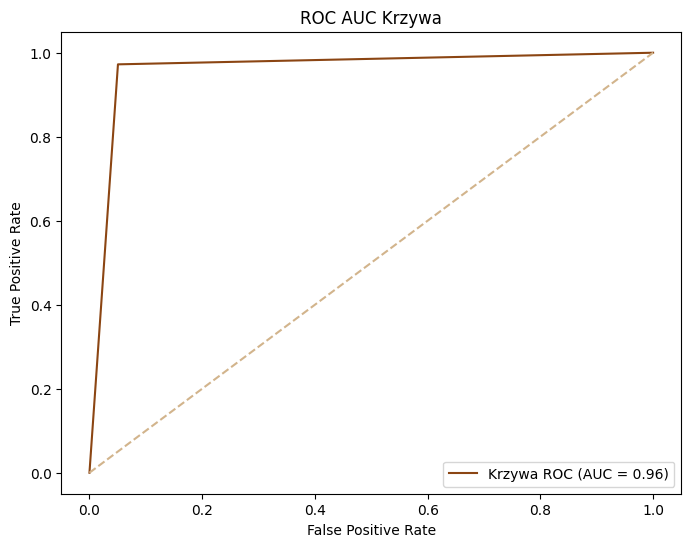

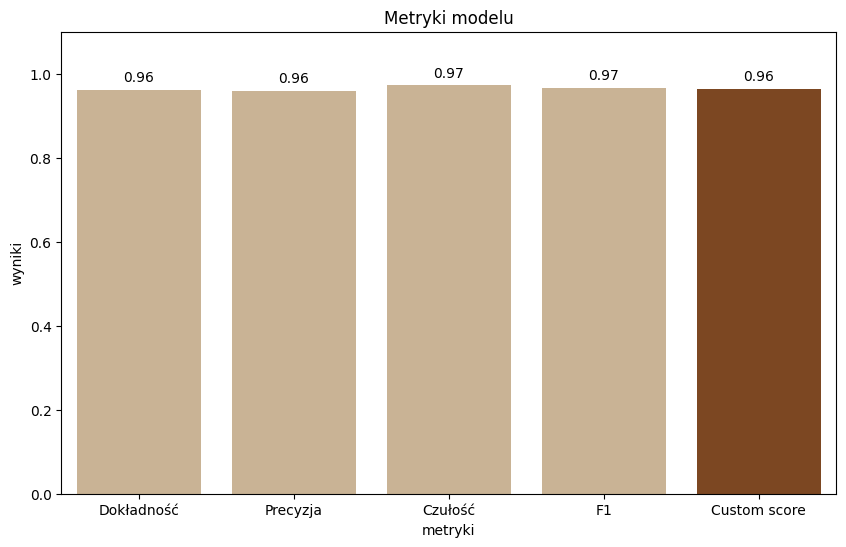

Model osiągnął bardzo wysoką dokładność (>90%).
To oznacza, że jest wyjątkowo skuteczny w klasyfikacji grzybów jako jadalne lub trujące.

Model ma bardzo wysoką czułość (>90%),
co oznacza, że potrafi niemal bezbłędnie wykrywać trujące grzyby.
To kluczowa cecha dla zapewnienia bezpieczeństwa.

Model ma bardzo wysoką precyzję (>90%),
co oznacza, że większość grzybów sklasyfikowanych jako trujące faktycznie jest trująca.

Model osiągnął bardzo wysoki wynik F1 (>90%),
co oznacza, że dobrze równoważy precyzję i czułość.

W przypadku klasyfikacji grzybów kluczowe znaczenie ma czułość (sensitivity/recall),
ponieważ pomyłka w postaci zaklasyfikowania trującego grzyba jako jadalny
może prowadzić do poważnych konsekwencji zdrowotnych.
Dlatego model powinien być zoptymalizowany pod kątem minimalizacji tego ryzyka.



In [12]:
automl1.summary_report()

### Dataset 2

In [33]:
automl2 = AutoMushroom()
automl2.fit(X_train2, y_train2, mode = "fast", voting='soft')

/Users/klaudiakwoka/anaconda3/envs/AutoML/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [34]:
print(automl2.best_score)
print(automl2.metrics)
automl2.best_model

1.0
{'accuracy': 0.997134670487106, 'precision': 0.9960087082728593, 'recall': 0.9989082969432315, 'f1': 0.9974563953488372, 'roc_auc': 0.99688165081025, 'confusion_matrix': array([[2127,   11],
       [   3, 2745]]), 'roc_curve': (array([0.      , 0.005145, 1.      ]), array([0.       , 0.9989083, 1.       ]))}


VotingClassifier(estimators=[('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=1)),
                             ('GradientBoostingClassifier',
                              GradientBoostingClassifier(learning_rate=0.08925147435983626,
                                                         max_depth=8,
                                                         n_estimators=471,
                                                         subsample=0.9580540115754429)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=10,
                                                     n_estimators=734)),
                             ('LogisticRegression',
                              LogisticRegression(C=7713.20653266746,
                                                 max_iter=3000, penalty='l1',
                                                 solver='liblinear'))],
                 n_jobs=-1, voting='soft')

In [36]:
automl2.predict_proba(X_test2)

array([[0.01899972, 0.98100028],
       [0.70703883, 0.29296117],
       [0.14705073, 0.85294927],
       ...,
       [0.77906931, 0.22093069],
       [0.07085559, 0.92914441],
       [0.92200833, 0.07799167]])

Pakiet AutoMushroom dla grzybiarzy
Analizowane są zbiory danych z podziałem na klasy 0 lub 1, gdzie 0 oznacza jadalny grzyb, a 1 trujący.
Analiza danych:
Liczba wierszy: 48855
Liczba kolumn: 20
Liczba zmiennych kategorycznych: 17
Liczba zmiennych numerycznych: 3
Braki danych:
cap-surface          11316
gill-attachment       7845
gill-spacing         20130
stem-root            41226
stem-surface         30482
veil-type            46299
veil-color           42879
ring-type             1974
spore-print-color    43789
dtype: int64
Całkowita liczba brakujących wartości we wszystkich kolumnach: 245940
Balans klas:


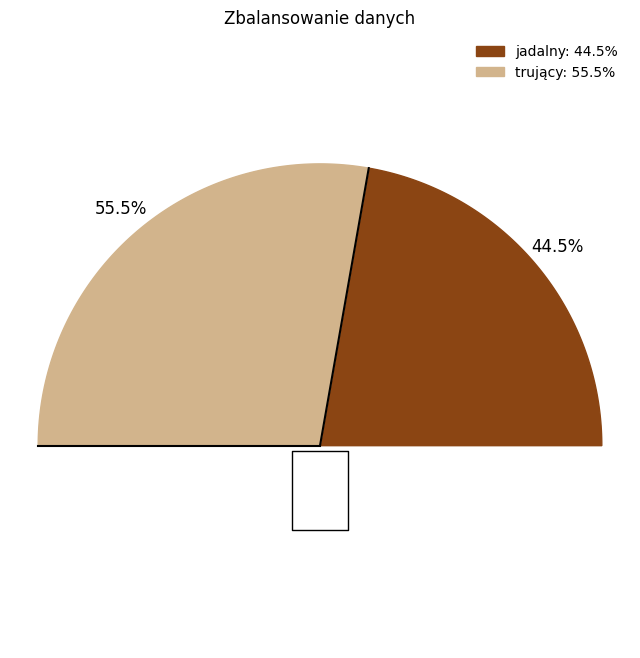

Zbiór jest zbalansowany.
Preprocessing składa się z kilku etapów:
Numeryczne dane są wypełniane średnią w przypadku braków, a następnie skalowane do zakresu [0,1] przy użyciu MinMaxScaler.
Dane kategoryczne są uzupełniane najczęściej występującymi wartościami, a następnie kodowane za pomocą metody one-hot encoding.
W trybie treningowym wybierane są istotne cechy za pomocą klasyfikatora Random Forest i SelectFromModel, a dane testowe są ograniczane do wybranych cech.
Ważność cech:
Łącznie wybrano 33 cech.
Wybrane cechy:
Index(['cap-diameter', 'stem-height', 'stem-width', 'cap-shape_c',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_t',
       'cap-surface_y', 'cap-color_e', 'cap-color_n', 'cap-color_r',
       'does-bruise-or-bleed_t', 'gill-attachment_d', 'gill-attachment_e',
       'gill-attachment_p', 'gill-attachment_x', 'gill-spacing_d',
       'gill-color_n', 'gill-color_p', 'gill-color_w', 'gill-color_y',
       'stem-root_c', 'stem-root_r', 'stem-root_s', '

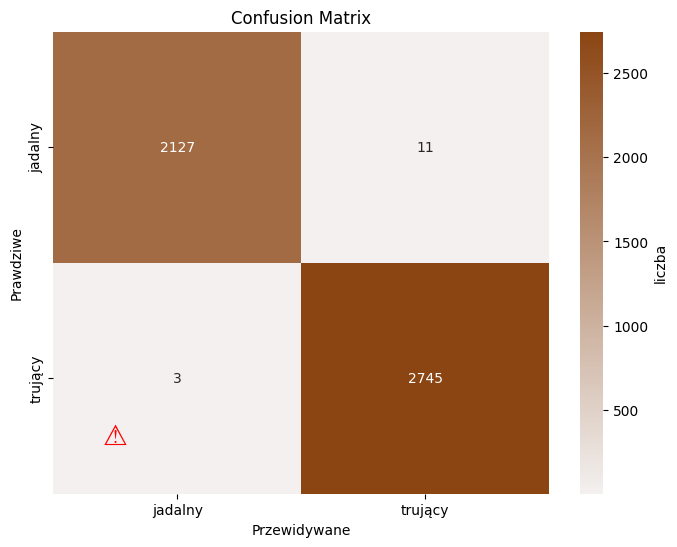

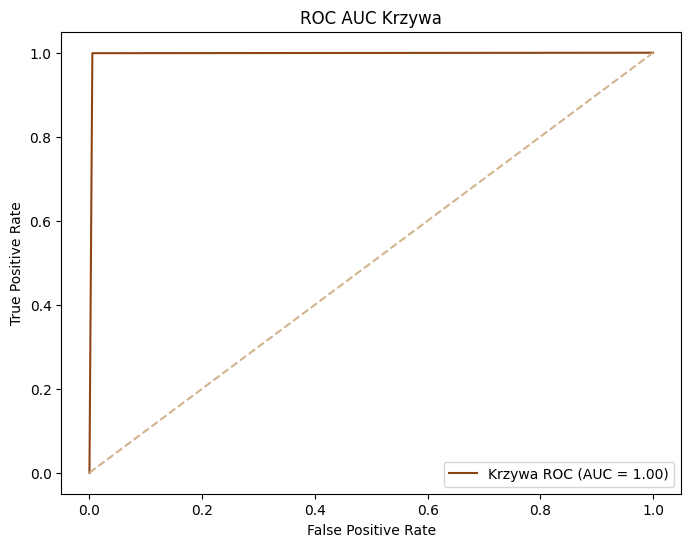

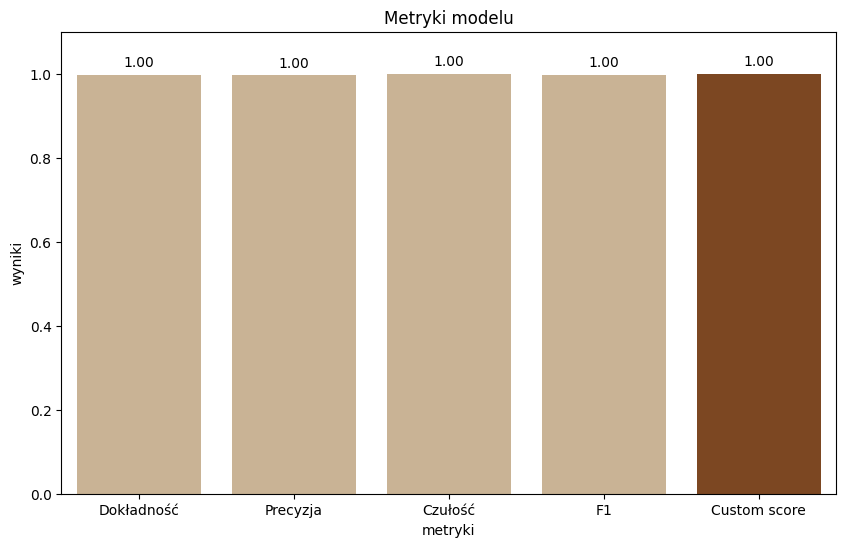

Model osiągnął bardzo wysoką dokładność (>90%).
To oznacza, że jest wyjątkowo skuteczny w klasyfikacji grzybów jako jadalne lub trujące.

Model ma bardzo wysoką czułość (>90%),
co oznacza, że potrafi niemal bezbłędnie wykrywać trujące grzyby.
To kluczowa cecha dla zapewnienia bezpieczeństwa.

Model ma bardzo wysoką precyzję (>90%),
co oznacza, że większość grzybów sklasyfikowanych jako trujące faktycznie jest trująca.

Model osiągnął bardzo wysoki wynik F1 (>90%),
co oznacza, że dobrze równoważy precyzję i czułość.

W przypadku klasyfikacji grzybów kluczowe znaczenie ma czułość (sensitivity/recall),
ponieważ pomyłka w postaci zaklasyfikowania trującego grzyba jako jadalny
może prowadzić do poważnych konsekwencji zdrowotnych.
Dlatego model powinien być zoptymalizowany pod kątem minimalizacji tego ryzyka.



In [37]:
automl2.summary_report()

### Dataset 3

In [38]:
automl3 = AutoMushroom()
automl3.fit(X_train3, y_train3, mode = "fast")

/Users/klaudiakwoka/anaconda3/envs/AutoML/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [39]:
print(automl3.best_score)
print(automl3.metrics)
automl3.best_model

1.0
{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'roc_auc': 1.0, 'confusion_matrix': array([[313,   0],
       [  0, 337]]), 'roc_curve': (array([0., 0., 1.]), array([0., 1., 1.]))}


KNeighborsClassifier(n_neighbors=1)

In [40]:
automl3.predict(X_test3)

array([0, 1, 0, ..., 1, 1, 0])

Pakiet AutoMushroom dla grzybiarzy
Analizowane są zbiory danych z podziałem na klasy 0 lub 1, gdzie 0 oznacza jadalny grzyb, a 1 trujący.
Analiza danych:
Liczba wierszy: 6499
Liczba kolumn: 22
Liczba zmiennych kategorycznych: 22
Liczba zmiennych numerycznych: 0
Nie ma braków danych.
Balans klas:


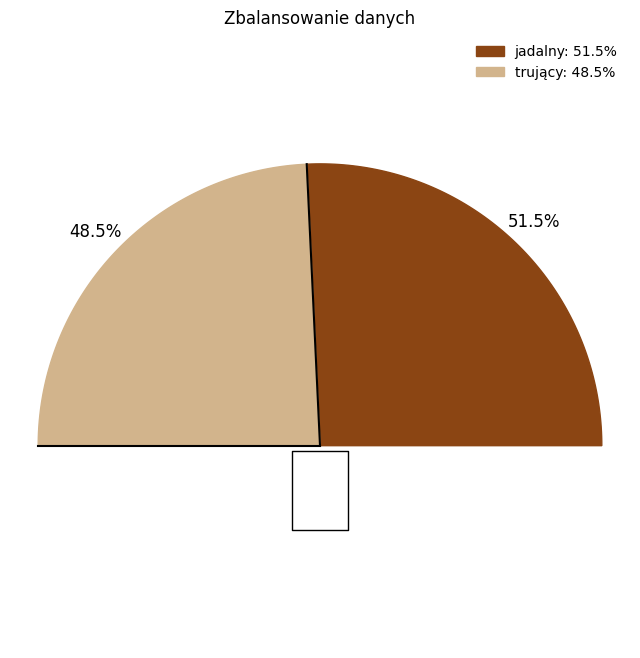

Zbiór jest zbalansowany.
Preprocessing składa się z kilku etapów:
Numeryczne dane są wypełniane średnią w przypadku braków, a następnie skalowane do zakresu [0,1] przy użyciu MinMaxScaler.
Dane kategoryczne są uzupełniane najczęściej występującymi wartościami, a następnie kodowane za pomocą metody one-hot encoding.
W trybie treningowym wybierane są istotne cechy za pomocą klasyfikatora Random Forest i SelectFromModel, a dane testowe są ograniczane do wybranych cech.
Ważność cech:
Łącznie wybrano 25 cech.
Wybrane cechy:
Index(['bruises_t', 'odor_c', 'odor_f', 'odor_n', 'odor_p', 'odor_y',
       'gill-spacing_w', 'gill-size_n', 'stalk-shape_t', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-below-ring_k',
       'stalk-surface-below-ring_s', 'ring-number_t', 'ring-type_l',
       'ring-type_p', 'spore-print-color_h', 'spore-print-color_k',
       'spore-print-color_n', 'spore-print-color_w', 'popul

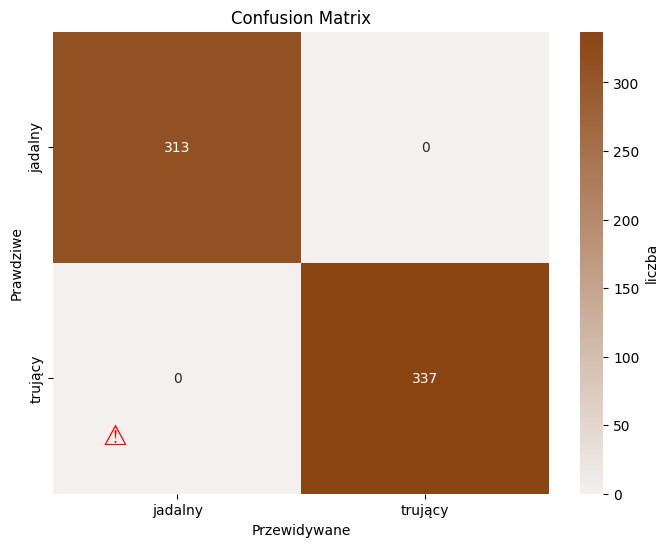

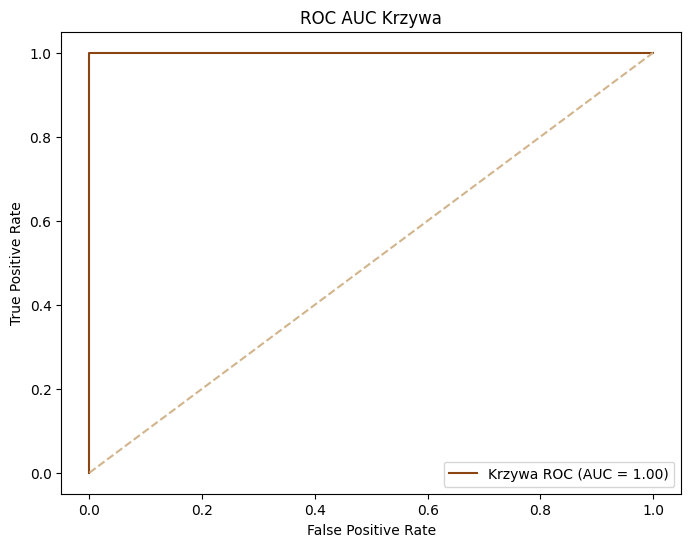

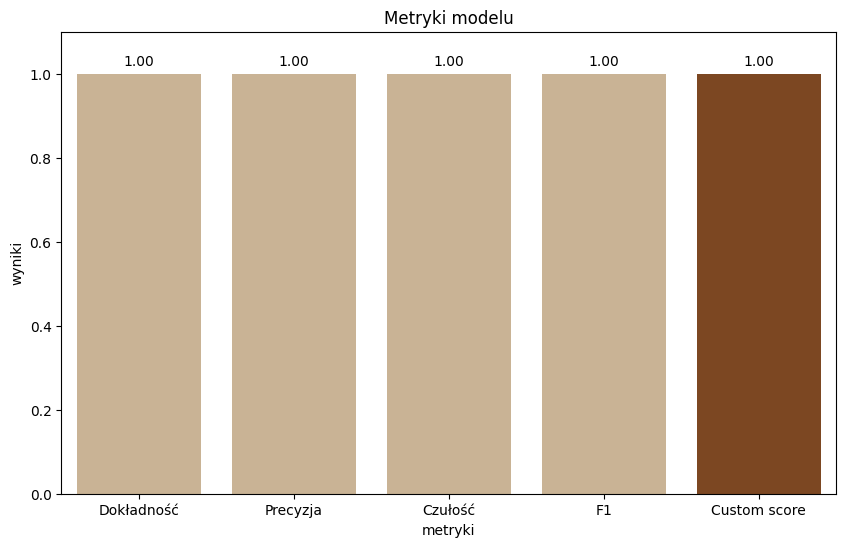

Model osiągnął bardzo wysoką dokładność (>90%).
To oznacza, że jest wyjątkowo skuteczny w klasyfikacji grzybów jako jadalne lub trujące.

Model ma bardzo wysoką czułość (>90%),
co oznacza, że potrafi niemal bezbłędnie wykrywać trujące grzyby.
To kluczowa cecha dla zapewnienia bezpieczeństwa.

Model ma bardzo wysoką precyzję (>90%),
co oznacza, że większość grzybów sklasyfikowanych jako trujące faktycznie jest trująca.

Model osiągnął bardzo wysoki wynik F1 (>90%),
co oznacza, że dobrze równoważy precyzję i czułość.

W przypadku klasyfikacji grzybów kluczowe znaczenie ma czułość (sensitivity/recall),
ponieważ pomyłka w postaci zaklasyfikowania trującego grzyba jako jadalny
może prowadzić do poważnych konsekwencji zdrowotnych.
Dlatego model powinien być zoptymalizowany pod kątem minimalizacji tego ryzyka.



In [41]:
automl3.summary_report()